## Carga de Librerías

In [1]:
# cargamos librerías necesarias
import os
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

from sklearn.preprocessing import LabelEncoder # para codificar variables categóricas
from sklearn.preprocessing import StandardScaler # Para escalar/normalizar
from sklearn.preprocessing import QuantileTransformer, quantile_transform # Para convertir la distribución de variable objetivo en normal


from sklearn.linear_model import RidgeCV # modelo de regresión Ridge con validación cruzada 
from sklearn.model_selection import train_test_split

import seaborn as sns #Librería para graficar

from sklearn.feature_selection import f_regression, mutual_info_regression # análisis estadístico: F-test, Mutual regression

from sklearn.linear_model import Ridge #Modelo de regresión Ridge
from sklearn.linear_model import Lasso #Modelo de regresión Lasso
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor #Modelo de regresión Decision Tree


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error #métricas para evaluar nuestros modelos
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

import folium 
import plotly.express as px
from sklearn.pipeline import Pipeline as pipe
from wordcloud import WordCloud

## **Cargamos el fichero**

**Dataset**

Fuente: Kaggle + Scraping  (Indeed + Glassdoor)

In [2]:
# cargamos fichero
data = pd.read_csv("/content/merge_all.csv")
print(f'Dimensiones del Dataset: {data.shape}')
data.head(10)

Dimensiones del Dataset: (8773, 13)


,work_year,experience_level,employment_type,job,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_summary
0,2022,EN,FT,Cyber Security,Cyber Program Manager,63000,USD,63000,United States,50,United States,S,NaN
1,2022,MI,FT,Cyber Security,Security Analyst,95000,USD,95000,United States,0,United States,M,NaN
2,2022,MI,FT,Cyber Security,Security Analyst,70000,USD,70000,United States,0,United States,M,NaN
3,2022,MI,FT,Cyber Security,IT Security Analyst,250000,BRL,48853,Brazil,50,Brazil,L,NaN
4,2022,EN,CT,Cyber Security,Cyber Security Analyst,120000,USD,120000,Botswana,100,Botswana,S,NaN
5,2022,EX,FT,Mobile Developer,Application Security Architect,315000,USD,315000,United States,100,United States,L,NaN
6,2022,SE,FT,Cyber Security,Security Researcher,220000,USD,220000,United States,100,United States,M,NaN
7,2022,SE,FT,Cyber Security,Security Researcher,140000,USD,140000,United States,100,United States,M,NaN
8,2021,MI,FT,Cyber Security,Information Security Compliance Analyst,55000,GBP,75650,United Kingdom,50,United Kingdom,L,NaN
9,2022,EX,FT,Cyber Security,Information Security Compliance Manager,360000,USD,360000,Taiwan,100,Taiwan,L,NaN


## Análisis Exploratorio

Eliminamos las columnas "salary" y "currency" para quedarnos con "salary_in_usd" ya que se trata de la conversión de la moneda para facilitar la comparación y análisis de todos los países por igual


In [3]:
salarios = data.sort_values('salary_in_usd',ascending=True)
salarios.head(5)

,work_year,experience_level,employment_type,job,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_summary
6529,2022,NaN,CT,Web Developer,Web Development Intern,12000,INR,152,India,0,India,L,1. Learning how to create a website2. Lear lan...
6479,2022,NaN,FT,Web Developer,Web Designer & Developer Internship,36000,INR,455,India,0,India,NaN,". Write well designed, testable, efficient cod..."
6425,2022,NaN,CT,Web Developer,Web Developer Internship,42000,INR,530,India,100,India,L,1. Thorough understanding of ReactJS and its c...
6500,2022,NaN,CT,Web Developer,Web Developer,60000,INR,758,India,0,India,L,We are looking for a web developer who have go...
6454,2022,NaN,CT,Web Developer,Web Developer,60000,INR,758,India,0,India,L,Job Title - Web DeveloperVacancies - 2 -3Requi...


In [4]:
data=data.drop(["salary","salary_currency"], axis=1)

In [5]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', 'job_summary'],
      dtype='object')

Verificamos presencia de NAs

In [6]:
data.isna().sum()

work_year                0
experience_level      4316
employment_type          0
job                    555
job_title                0
salary_in_usd            0
employee_residence      12
remote_ratio             0
company_location        12
company_size          1300
job_summary           2106
dtype: int64

Eliminamos los NAs

In [7]:
data = data.dropna(subset=["job","employee_residence",'experience_level',"company_location"])

Eliminamos la variable company_size ya que tiene muchos nulos.

Eliminamos la variable job_summary ya que es descriptiva. Se utilizará de otra manera en NLP.

Aunque experience_level tiene casi un 50% de sus datos nulos la dejaremos ya que es una una variable importante para la predicción de los salarios.

In [8]:
data=data.drop(['company_size', 'job_summary'], axis=1)

In [9]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job                   0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
dtype: int64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,4167.0,2021.660427,0.608885,2020.0,2021.0,2022.0,2022.0,2022.0
salary_in_usd,4167.0,87067.511879,59917.270269,909.0,49572.0,71968.0,111775.0,600000.0
remote_ratio,4167.0,45.992321,47.508929,0.0,0.0,50.0,100.0,100.0


Observamos los países

In [11]:
pd.set_option('display.max_rows', None)

In [12]:
data.company_location.value_counts()

United States           1346
United Kingdom           364
Canada                   326
Australia                274
Ireland                  269
Singapore                248
India                    206
Netherlands              206
United-Kingdom           202
New Zealand              176
France                   127
Germany                   82
Spain                     52
Mexico                    30
Greece                    21
Brazil                    20
Portugal                  18
Italy                     15
Belgium                   15
Japan                     13
Switzerland               12
Pakistan                  11
Poland                     9
Austria                    7
Russia                     7
Turkey                     7
United Arab Emirates       7
Slovenia                   7
Romania                    6
Vietnam                    6
Sweden                     5
Denmark                    5
Nigeria                    5
Hungary                    5
Argentina     

Tenemos New-Zealand y New Zealand. United-Kingdom y United Kingdom debemos unificar estos países.

In [13]:
data.loc[data['company_location'] == 'New-Zealand', 'company_location'] = 'New Zealand'

In [14]:
data.loc[data['company_location'] == 'United-Kingdom', 'company_location'] = 'United Kingdom'

Nos quedamos con el Top 20 de países


In [15]:
data_top20 = pd.DataFrame()
for i in data.company_location.value_counts().index[0:20]:
  appended_data=data.loc[data["company_location"]==i]
  data_top20=data_top20.append(appended_data,ignore_index=True)

In [16]:
data_top20.company_location.value_counts()

United States     1346
United Kingdom     566
Canada             326
Australia          274
Ireland            269
Singapore          248
India              206
Netherlands        206
New Zealand        177
France             127
Germany             82
Spain               52
Mexico              30
Greece              21
Brazil              20
Portugal            18
Belgium             15
Italy               15
Japan               13
Switzerland         12
Name: company_location, dtype: int64

In [17]:
print(f'Dimensiones del Dataset: {data_top20.shape}')

Dimensiones del Dataset: (4023, 9)


In [18]:
data= data_top20 #Hacemos esto para no cambiar todos los "data" de aquí en adelante

Visualizamos los países del top20

In [19]:
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

In [20]:
country_counts = data.company_location.value_counts()
country_counts_df = pd.DataFrame({ 'company_location': country_counts.index, 'job': country_counts.values})
country_counts_df

,company_location,job
0,United States,1346
1,United Kingdom,566
2,Canada,326
3,Australia,274
4,Ireland,269
5,Singapore,248
6,India,206
7,Netherlands,206
8,New Zealand,177
9,France,127


In [21]:
country_counts_df.at[0, 'company_location'] = 'United States'
country_counts_df.at[12, 'company_location'] = 'Spain'

In [22]:
m = folium.Map(location=[30, 0], zoom_start=3)

folium.Choropleth(
    geo_data=countries_geojson,
    data=country_counts_df,
    columns=["company_location", "job"],
    key_on="feature.properties.name",
    threshold_scale=[0, 10, 30, 80, 100 , 200, 300, 550, 1350],
    fill_color="OrRd",
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name="Cantidad de Empleos",
).add_to(m)

m

Nube de palabras con los empleos con mayor presencia en nuestro dataset

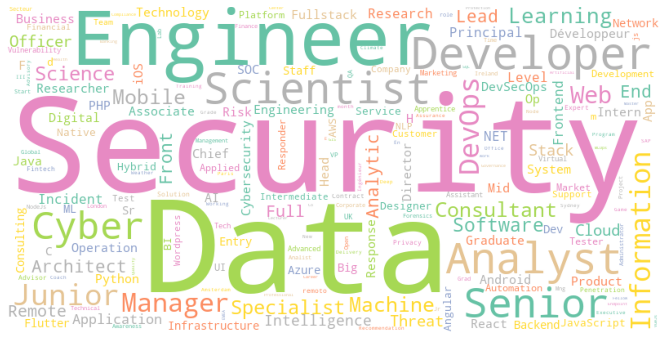

In [23]:
data.job_title
words = ' '.join((job for job in data.job_title.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='white', colormap='Set2').generate(words)

plt.figure(figsize=(12,6))
plt.axis("off")
plt.grid(False)
plt.imshow(wc);

In [24]:
data['work_year'].value_counts()

2022    3027
2021     726
2020     270
Name: work_year, dtype: int64

Gráfico de barras de la variable *work_year* (años de las ofertas).

[Text(0.5, 1.0, 'Años de las ofertas de trabajo')]

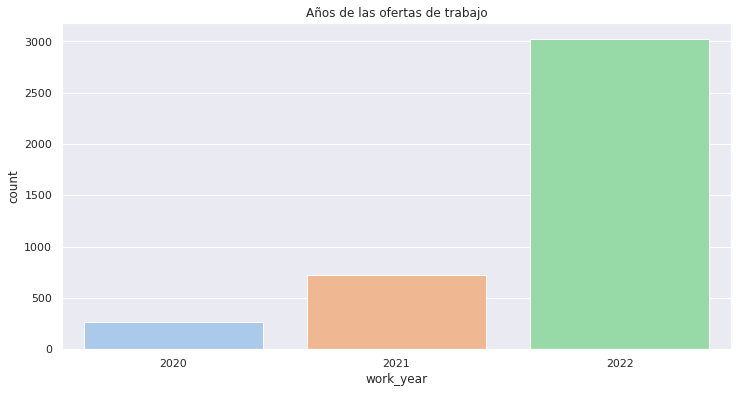

In [25]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_palette("pastel")
sns.countplot(x='work_year', data=data).set(title='Años de las ofertas de trabajo')

In [26]:
data['remote_ratio'].value_counts()

0      2024
100    1663
50      336
Name: remote_ratio, dtype: int64

Gráfico de barras de la variable *remote_ratio* (porcentaje de trabajo híbrido de las ofertas).

[Text(0.5, 1.0, 'Porcentaje de trabajos híbridos')]

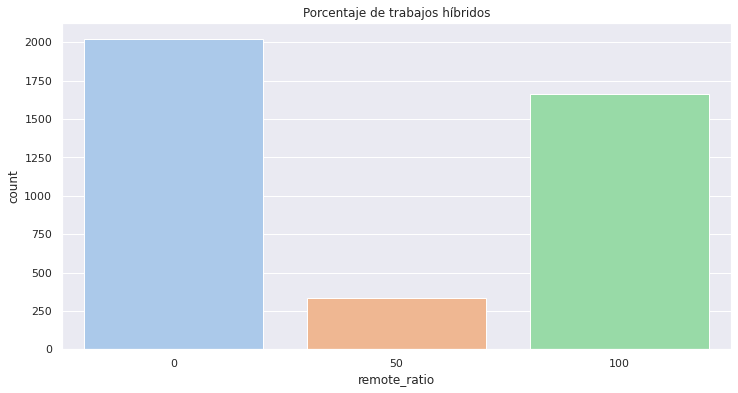

In [27]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_palette("pastel")
sns.countplot(x='remote_ratio', data=data).set(title='Porcentaje de trabajos híbridos')

In [28]:
data['employment_type'].value_counts()

FT    3799
CT     171
PT      47
FL       6
Name: employment_type, dtype: int64

Gráfico de barras de la variable *employment_type* (tipos de trabajo de las ofertas).




[Text(0.5, 1.0, 'Tipos de empleo')]

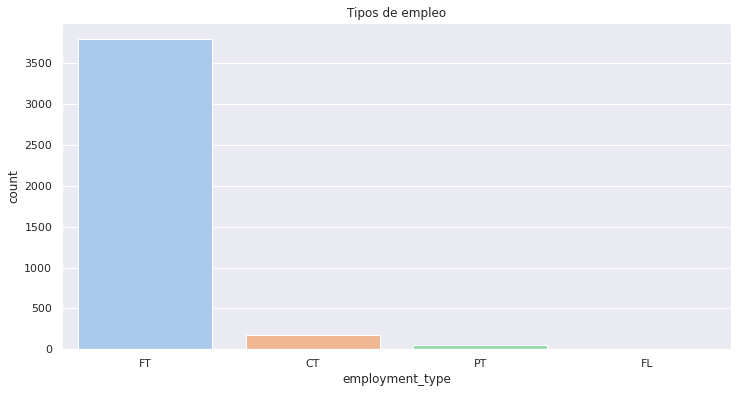

In [29]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_palette("pastel")
sns.countplot(x='employment_type', data=data).set(title='Tipos de empleo')

Gráfico de barras de la variable *experience_level* (nivel de experiencia).

[Text(0.5, 1.0, 'Nivel de Experiencia')]

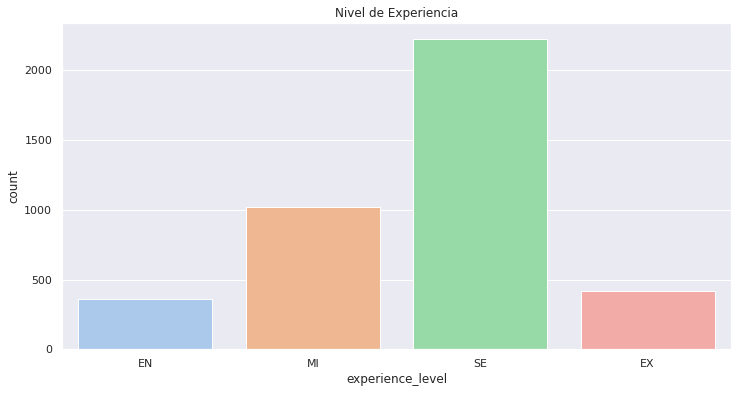

In [30]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_palette("pastel")
sns.countplot(x='experience_level', data=data,order=["EN","MI","SE","EX"]).set(title='Nivel de Experiencia')

Top 10 - Profesiones

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


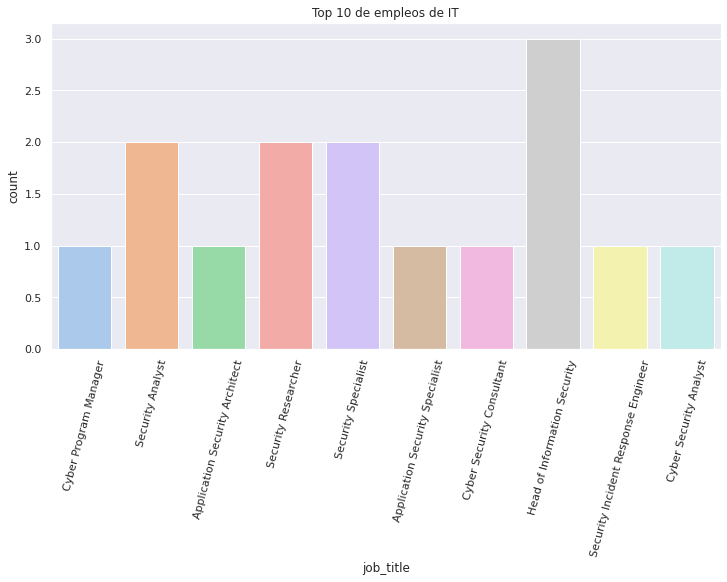

In [31]:
sns.set(rc={'figure.figsize':(12,6)})
plt.xticks(rotation=75)
sns.set_palette("pastel")
plt.title('Top 10 de empleos de IT')
sns.countplot(data['job_title'][:15])

Top 20.
Gráfico de barras de la variable *company_location* (Ubicación de las ofertas).


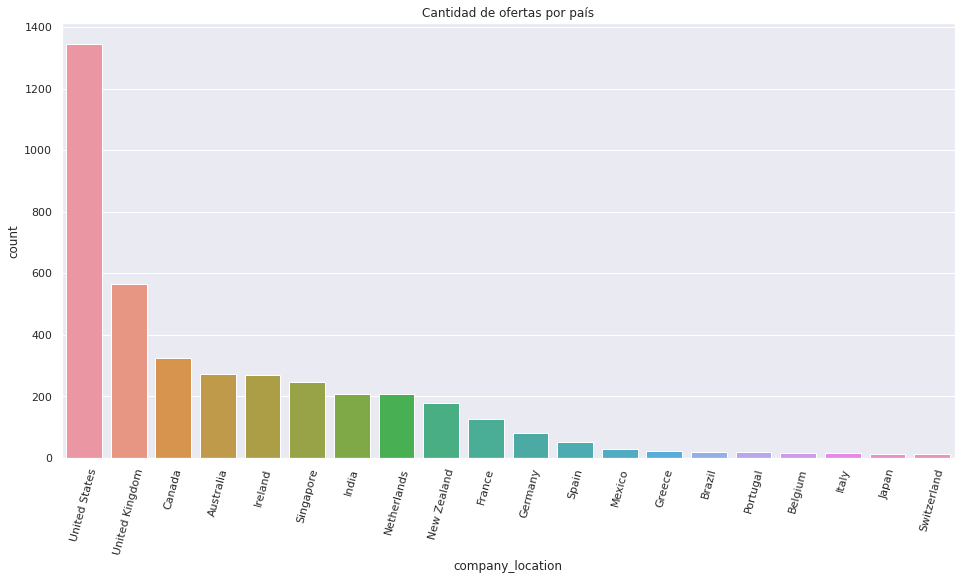

In [32]:
sns.set(rc={'figure.figsize':(16,8)})
plt.xticks(rotation=75)
plt.title('Cantidad de ofertas por país')
sns.countplot(x='company_location', data=data)

In [33]:
sns.set(rc={'figure.figsize':(16,8)})
px.histogram(data, x="company_location", marginal="box", title='Distribución de Ofertas')

In [34]:
data['job'].value_counts()

Data Scientist      1536
Cyber Security      1255
Web Developer        611
DevOps               376
Mobile Developer     245
Name: job, dtype: int64

In [35]:
sns.set(rc={'figure.figsize':(16,8)})
px.histogram(data, x="job", marginal="box", title='Distribución de Profesiones con más ofertas en IT')

In [36]:
cantidad_jobs = data.job.value_counts()
cantidad_jobs

Data Scientist      1536
Cyber Security      1255
Web Developer        611
DevOps               376
Mobile Developer     245
Name: job, dtype: int64

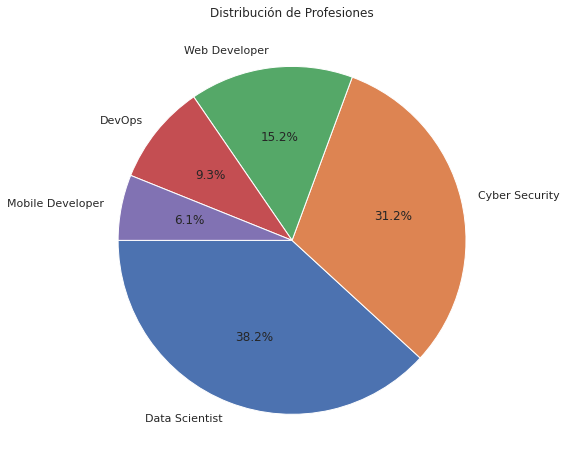

In [37]:
plt.figure(figsize=(16,8))
#add colors
colors = ['#c2def8','#c6cae6','#f0becf','#ffcc99', '#8faadc']

plt.title('Distribución de Profesiones')

plt.pie(cantidad_jobs, labels=cantidad_jobs.index, autopct='%1.1f%%', startangle=180);

Rango por niveles de experiencia por países

Eliminamos *job_title* ya que su información la encontramos resumida en la variable *job*

In [38]:
data = data.drop(['job_title'], axis=1)

## Detección de Outliers


In [39]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,4023.0,2021.685309,0.591587,2020.0,2022.0,2022.0,2022.0,2022.0
salary_in_usd,4023.0,88120.625155,59884.793703,909.0,50096.0,72500.0,112950.0,600000.0
remote_ratio,4023.0,45.513299,47.661670,0.0,0.0,0.0,100.0,100.0


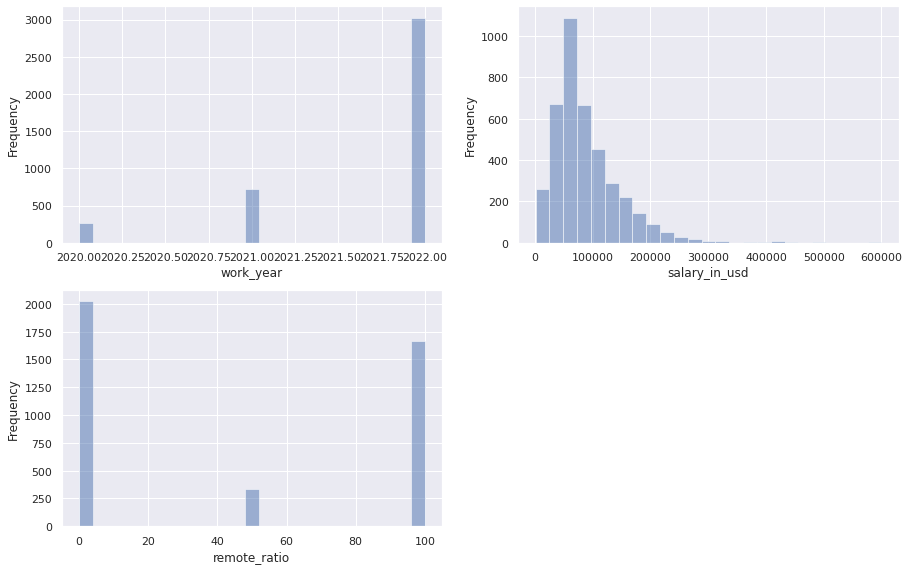

In [40]:
# para continuar analizando y entendiendo los datos vamos a representar los histogramas de los atributos
plt.figure(figsize=(15, 20))

plt.subplot(4,2,1)
data['work_year'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('work_year')

plt.subplot(4,2,2)
data['salary_in_usd'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('salary_in_usd')

plt.subplot(4,2,3)
data['remote_ratio'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('remote_ratio')


plt.show()

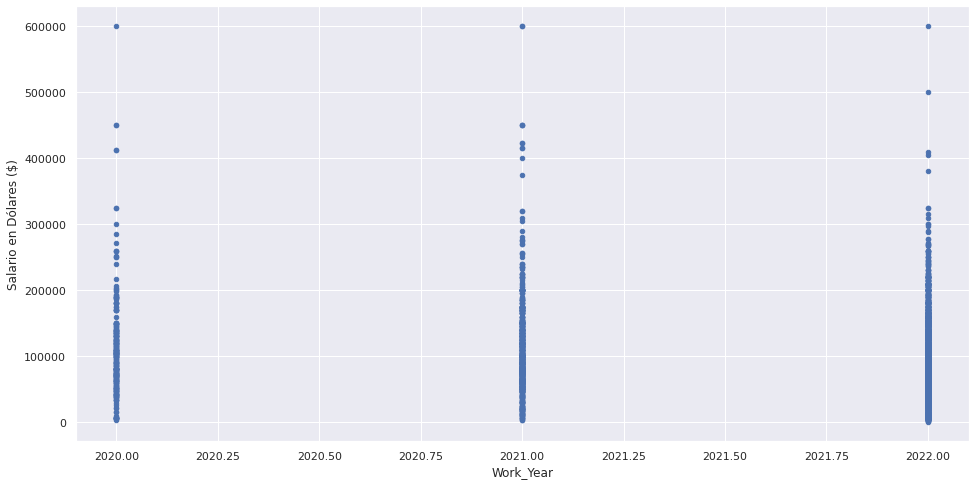

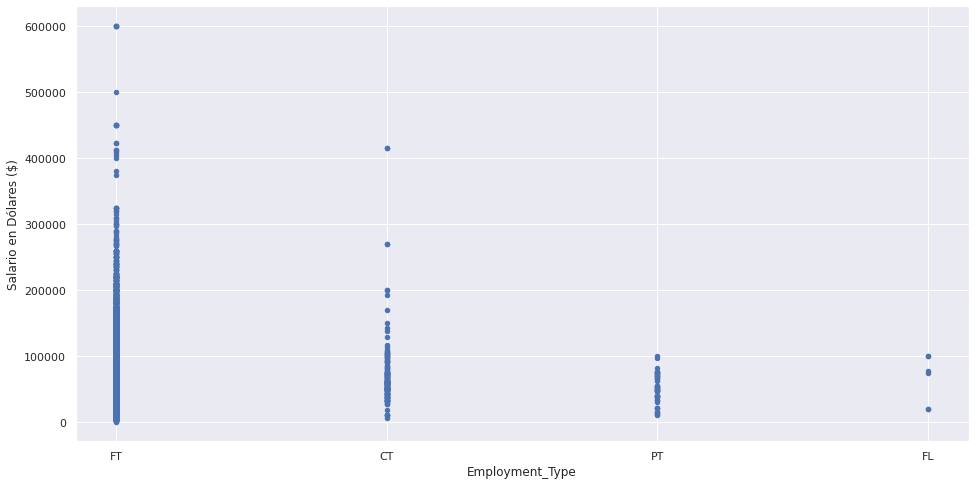

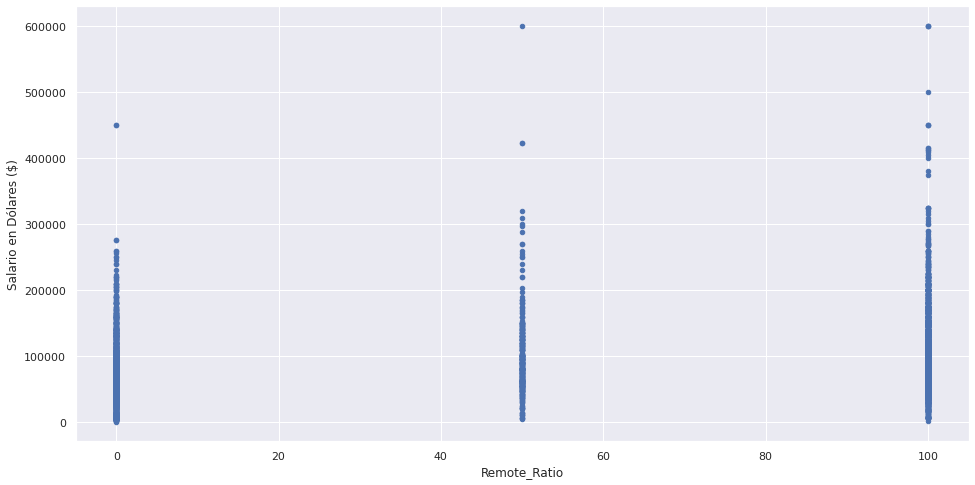

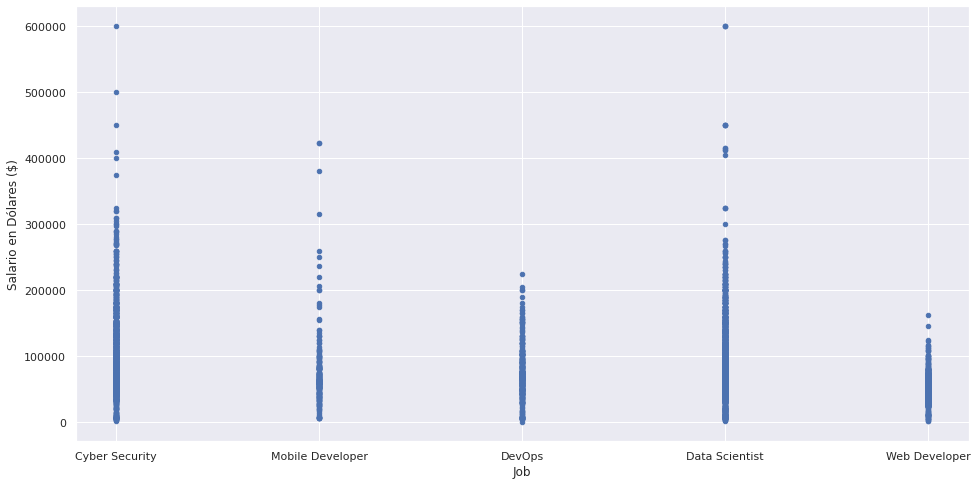

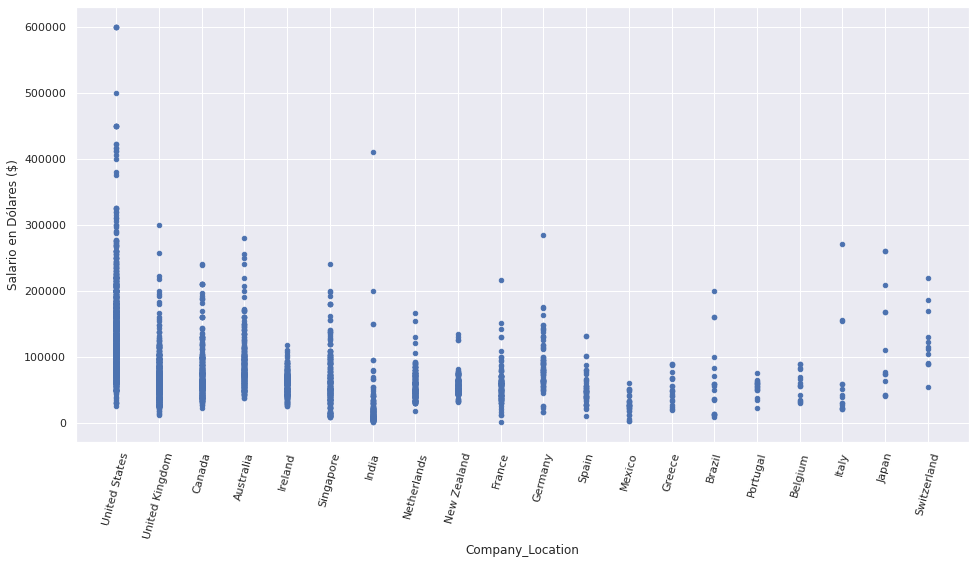

In [41]:
#Representamos de nuevo los datos para ver los outliers 
data.plot(kind = 'scatter',x='work_year',y = 'salary_in_usd')
plt.xlabel('Work_Year')
plt.ylabel('Salario en Dólares ($)')
plt.show()

data.plot(kind = 'scatter',x='employment_type',y = 'salary_in_usd')
plt.xlabel('Employment_Type')
plt.ylabel('Salario en Dólares ($)')
plt.show()

data.plot(kind = 'scatter',x='remote_ratio',y = 'salary_in_usd')
plt.xlabel('Remote_Ratio')
plt.ylabel('Salario en Dólares ($)')
plt.show()

data.plot(kind = 'scatter',x='job',y = 'salary_in_usd')
plt.xlabel('Job')
plt.ylabel('Salario en Dólares ($)')
plt.show()

data.plot(kind = 'scatter',x='company_location',y = 'salary_in_usd')
plt.xticks(rotation=75)
plt.xlabel('Company_Location')
plt.ylabel('Salario en Dólares ($)')
plt.show()



plt.show()

In [42]:
#Eliminamos Outliers
data_2 = data[data['salary_in_usd'] <= 450000]

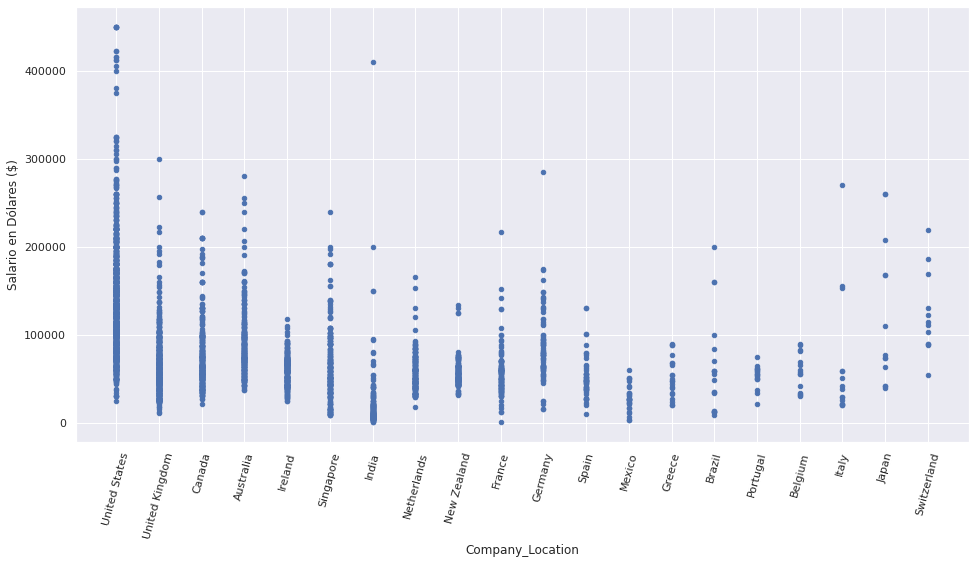

In [43]:
#Visualizamos los salarios por países despues del filtrado <= 400000
data_2.plot(kind = 'scatter',x='company_location',y = 'salary_in_usd')
plt.xticks(rotation=75)
plt.xlabel('Company_Location')
plt.ylabel('Salario en Dólares ($)')
plt.show()



plt.show()

In [44]:
data_3 = data_2[data_2['salary_in_usd'] >= 1000]

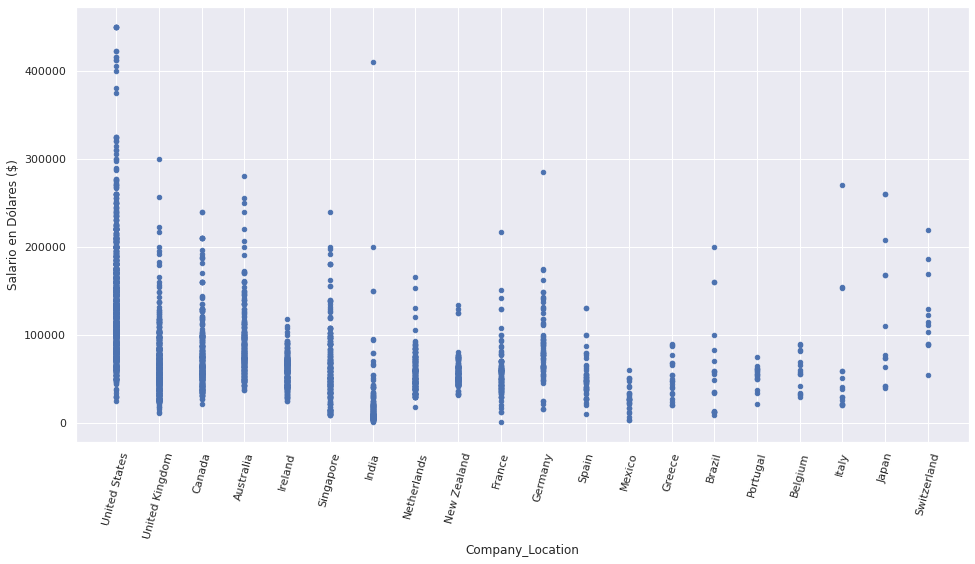

In [45]:
#Visualizamos los salarios por países despues del filtrado >= 9000
data_3.plot(kind = 'scatter',x='company_location',y = 'salary_in_usd')
plt.xticks(rotation=75)
plt.xlabel('Company_Location')
plt.ylabel('Salario en Dólares ($)')
plt.show()

plt.show()

In [46]:
#Cálculo de los registros que estamos filtrando
print(f'Original: {data.shape[0]}\nFiltered: {data_3.shape[0]}')
print(f'Diferencia: {int((data.shape[0] - data_3.shape[0])/data.shape[0]*100)}%')

Original: 4023
Filtered: 4017
Diferencia: 0%


In [47]:
data = data_3

## **División Train/Test**

In [48]:
# realizo la división del Dataset.
# el 20% de los datos serán para test y el 80% de los datos para training
train, test = train_test_split(data, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# creamos los ficheros csv 
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (3213, 8)
Dimensiones del dataset de test: (804, 8)


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3213 entries, 3719 to 2737
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3213 non-null   int64 
 1   experience_level    3213 non-null   object
 2   employment_type     3213 non-null   object
 3   job                 3213 non-null   object
 4   salary_in_usd       3213 non-null   int64 
 5   employee_residence  3213 non-null   object
 6   remote_ratio        3213 non-null   int64 
 7   company_location    3213 non-null   object
dtypes: int64(3), object(5)
memory usage: 225.9+ KB


Vemos los valores únicos que toma cada columna de nuestro dataset

In [50]:
for u in train.columns:
  print(u)
  print(train[u].unique())

work_year
[2022 2021 2020]
experience_level
['MI' 'SE' 'EX' 'EN']
employment_type
['FT' 'CT' 'PT' 'FL']
job
['Web Developer' 'Cyber Security' 'Data Scientist' 'DevOps'
 'Mobile Developer']
salary_in_usd
[ 30064  60103 270647 ...  63282 105223  70650]
employee_residence
['France' 'Netherlands' 'Italy' 'Spain' 'Australia' 'United States'
 'United-Kingdom' 'Ireland' 'United Kingdom' 'Canada' 'Germany' 'India'
 'Singapore' 'New Zealand' 'Mexico' 'Japan' 'Greece' 'Switzerland'
 'Portugal' 'Brazil' 'Belgium' 'New-Zealand']
remote_ratio
[  0  50 100]
company_location
['France' 'Netherlands' 'Italy' 'Spain' 'Australia' 'United States'
 'United Kingdom' 'Ireland' 'Canada' 'Germany' 'India' 'Singapore'
 'New Zealand' 'Mexico' 'Japan' 'Greece' 'Switzerland' 'Portugal' 'Brazil'
 'Belgium']


Categorizamos las variables con Mean Encoder 

[MeanEncoder](https://maxhalford.github.io/blog/target-encoding): Asigna un valor a cada variable categórica según la media de la columna objetivo para el conjunto de registros que tienen esa variable categórica. Es decir, si quisiera categorizar la variable *company_location* con un ME, lo que tendría que hacer es calcular la media de salario en cada país (United States, Spain, etc) y sustituir el nombre del país por esa media.

Probamos el Labelencoder pero el mean encoder nos dió mejores resultados. Esto se debe a que cuando hay muchas categorías (es decir, no es binario) un LE puede llevar a errores porque asigna números a cada una de ellas, con lo cual el algoritmo puede "aprender" erróneamente.

In [51]:
#MEAN ENCODING para TRAIN
categorical = ['work_year', 'employment_type', 'job', 'experience_level',
       'employee_residence', 'remote_ratio', 'company_location']

mean_map = {}
for c in categorical:
     mean = train.groupby(c)['salary_in_usd'].mean()
     train[c] = train[c].map(mean)    
     mean_map[c] = mean

In [52]:
for u in train.columns:
  print(u)
  print(train[u].unique())

work_year
[ 79776.31436758 109131.92920354 110290.48292683]
experience_level
[81811.67910448 92506.72853958 92117.49544073 59868.20979021]
employment_type
[88132.97132498 69350.14705882 54373.58974359 53750.        ]
job
[ 51834.25502008 103711.05467197  92334.83799342  74164.09240924
  75078.74736842]
salary_in_usd
[ 30064  60103 270647 ...  63282 105223  70650]
employee_residence
[ 58457.54716981  56064.47169811  60271.21428571  49487.325
  87953.30530973 135197.42802669  70881.44171779  60396.99547511
  63432.41891892  76940.61940299  86295.88135593  20670.45783133
  60471.91        56650.          27814.7826087  140368.9
  48565.         105786.625       52471.76470588  65635.1875
  63195.16666667 130000.        ]
remote_ratio
[ 67731.22215422  97499.09774436 108572.00913938]
company_location
[ 58457.54716981  56064.47169811  60271.21428571  49487.325
  87953.30530973 135197.42802669  66077.71459695  60396.99547511
  76940.61940299  86295.88135593  20670.45783133  60471.91
  57152.

Matriz de correlación

In [53]:
# matríz de correlación
train.corr() 

,work_year,experience_level,employment_type,job,salary_in_usd,employee_residence,remote_ratio,company_location
work_year,1.000000,-0.327695,0.037535,0.322665,0.221123,0.268264,0.316304,0.270876
experience_level,-0.327695,1.000000,0.018934,-0.110775,0.167336,-0.117274,-0.126949,-0.119365
employment_type,0.037535,0.018934,1.000000,0.048605,0.093503,0.074807,0.048051,0.074798
job,0.322665,-0.110775,0.048605,1.000000,0.309281,0.323255,0.220516,0.320816
salary_in_usd,0.221123,0.167336,0.093503,0.309281,1.000000,0.639115,0.343949,0.638285
employee_residence,0.268264,-0.117274,0.074807,0.323255,0.639115,1.000000,0.383682,0.998701
remote_ratio,0.316304,-0.126949,0.048051,0.220516,0.343949,0.383682,1.000000,0.385675
company_location,0.270876,-0.119365,0.074798,0.320816,0.638285,0.998701,0.385675,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



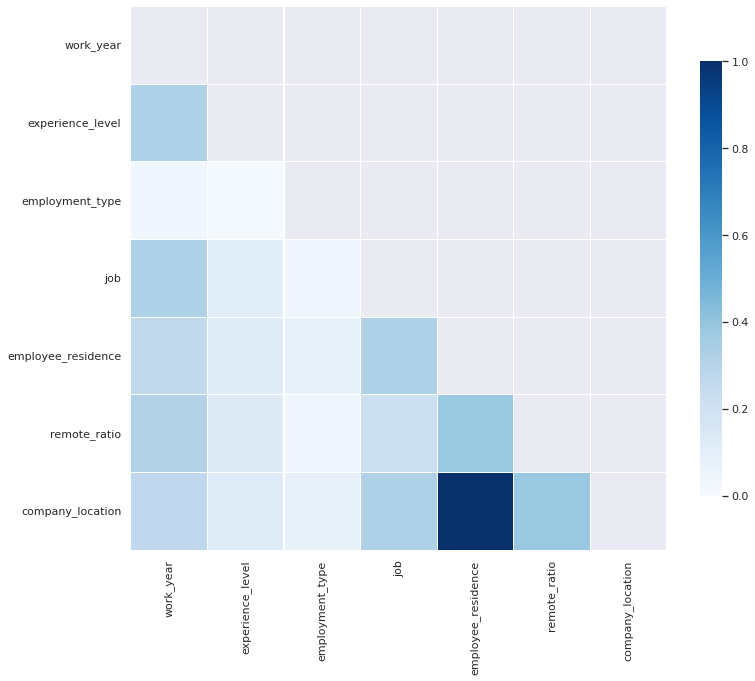

In [54]:
# compute the correlation matrix
corr = np.abs(train.drop(['salary_in_usd'], axis=1).corr())

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="Blues", cbar_kws={"shrink": .8})

plt.show()

Representación (scatter_plot)

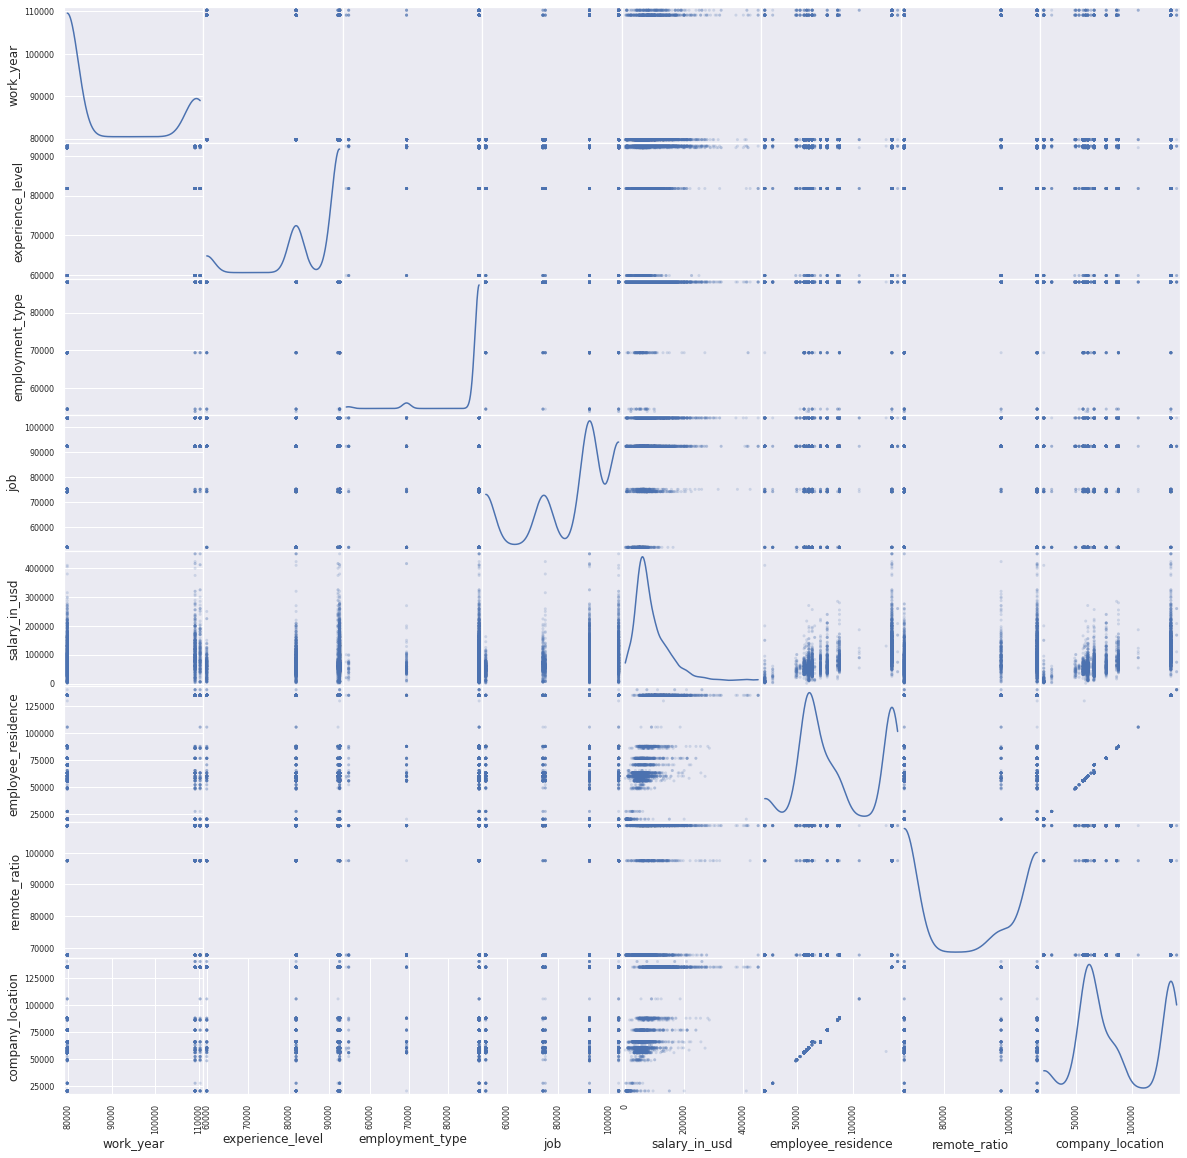

In [55]:
pd.plotting.scatter_matrix(train, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

In [56]:
print(f'Dimensiones del Dataset de Train: {train.shape}')

Dimensiones del Dataset de Train: (3213, 8)


Eliminamos *employee_residence* ya que está muy relacionada a *company_location*

In [57]:
 train = train.drop(['employee_residence'], axis=1)

In [58]:
print(f'Dimensiones del Dataset de Train: {train.shape}')

Dimensiones del Dataset de Train: (3213, 7)


Transformación de la variable objetibvo (*salary_in_usd*) mediante QuantileTransformer. 

Este método transforma las *features* para seguir una distribución uniforme o normal. Por tanto, para una determinada *feature*, esta transformación tiende a dispersar los valores más frecuentes. También reduce el impacto de los valores atípicos (*outliers*): por lo tanto, se trata de un esquema de preprocesamiento sólido.



In [59]:
y=train["salary_in_usd"]
y

3719     30064
3434     60103
3985    270647
3393     32455
3827    100474
2286     55081
646     130000
299     140000
1771     83943
2368     73038
2590     79440
156     130200
195     148800
619      63000
1659     45130
1842     91385
2235     83300
5       140000
1145    266400
3754     72533
3194      5517
3620    108258
3681     65138
2916     50998
2052     36859
3487     73129
2635     31051
369     120000
104     139000
1479     18280
3282     30064
1381     36234
3879     23001
899     105000
2315     79184
3742     30051
1259     89464
3853     32974
3389     54525
3234     13884
1994     85000
3176     17483
3800     76833
3334     32455
2302     59598
3997     51064
1720     34263
716     159000
1647     22851
2969    120000
2853     28049
1125    210000
3186     16415
361      99980
1341     78934
2565     69145
2347     65239
782     115000
3703     20179
3423     90154
799      90000
2236     74900
4002     74000
2188     35521
521      96000
1545     70158
3551     5

In [60]:
qt = QuantileTransformer(n_quantiles=500, output_distribution="normal", copy=True, random_state=0)
qt.fit(train["salary_in_usd"].to_frame())

train["salary_in_usd"]=qt.transform(train["salary_in_usd"].to_frame()).squeeze()

Text(0.5, 0.02, 'salary_in_usd-TRAIN')

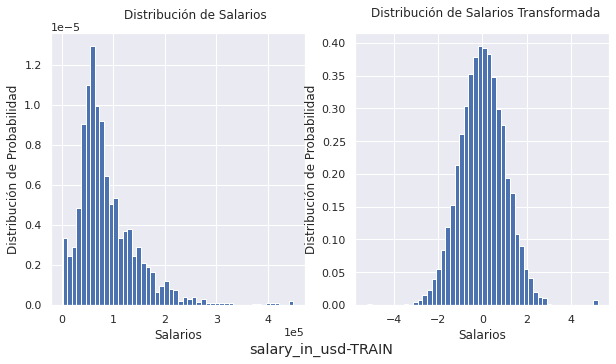

In [61]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))

ax0.hist(y, bins=50, density=True)
ax0.set_ylabel("Distribución de Probabilidad")
ax0.set_xlabel("Salarios")
ax0.text(s="Distribución de Salarios", x=1.2e5, y=14.3e-6, fontsize=12)
ax0.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
#1.2e5
ax1.hist(train["salary_in_usd"], bins=50, density=True)
ax1.set_ylabel("Distribución de Probabilidad")
ax1.set_xlabel("Salarios")
ax1.text(s="Distribución de Salarios Transformada", x=-5, y=0.440, fontsize=12)

f.suptitle("salary_in_usd-TRAIN", y=0.02)

División X, Y a Train

Haremos la división X y Y para probar distintos modelos guardando las variables en un nuevo Dataset para realizar diferentes pruebas 

In [62]:
data_train = train

X_train = data_train.drop(['salary_in_usd'], axis=1) # nos quedamos con el resto
y_train = data_train['salary_in_usd']  # nos quedamos con la objetivo, salarios en dólares

# normalización/escalado con los datos de Train
scaler = StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [63]:
X_train.columns

Index(['work_year', 'experience_level', 'employment_type', 'job',
       'remote_ratio', 'company_location'],
      dtype='object')

Evaluamos cuales features son más relevantes para nuestra predicción

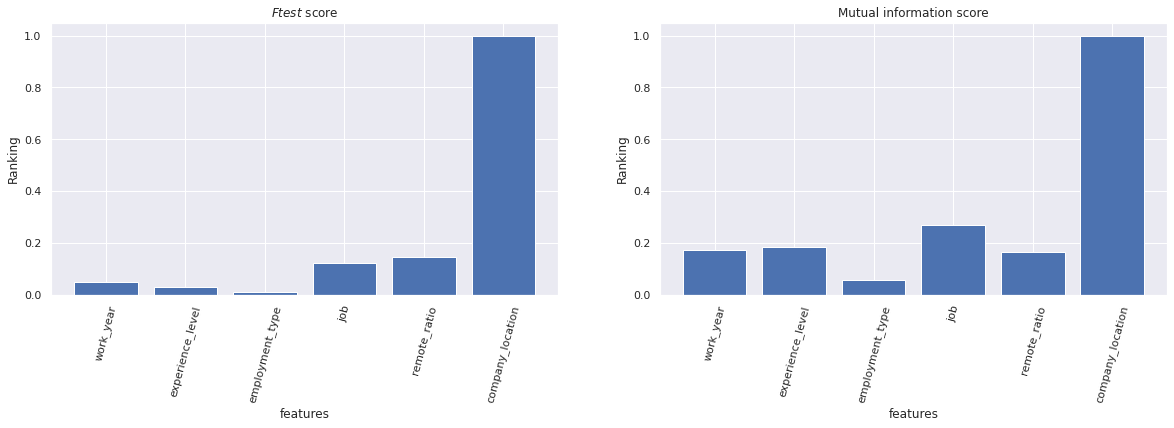

In [64]:
feature_names = ['work_year', 'experience_level', 'employment_type', 'job',
       'remote_ratio', 'company_location']

# do calculations
f_test, _ = f_regression(X_train, y_train)
f_test /= np.max(f_test)

mi = mutual_info_regression(X_train, y_train)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X_train.shape[1]),f_test,  align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 75)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F test$ score')

plt.subplot(1,2,2)
plt.bar(range(X_train.shape[1]),mi, align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 75)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

## Test


Cargamos el dataset de Test y le realizamos el mismo procesamiento que a train 

In [65]:
test = pd.read_csv('./test.csv', sep=';', decimal='.')

In [66]:
test.columns

Index(['work_year', 'experience_level', 'employment_type', 'job',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location'],
      dtype='object')

In [67]:
#MEAN ENCODER para TEST
for c in categorical:
    test[c] = test[c].map(mean_map[c])

In [68]:
test=test.drop(["employee_residence"], axis=1)

In [69]:
y=test["salary_in_usd"]
y

0       75525
1       55705
2      200000
3       42213
4       41296
5       50000
6      160000
7       53000
8       60127
9      130000
10      58156
11      58223
12      99292
13     115000
14      21600
15      46580
16      63197
17      54451
18     126000
19     175000
20      93155
21      63197
22      52000
23      73000
24      64369
25      64140
26     230000
27      51108
28      30134
29      83537
30      62641
31      71980
32     111900
33      72625
34     185000
35      46660
36      72055
37     150000
38      61707
39      46874
40      52611
41     114000
42      53182
43      65013
44     200000
45      67997
46      42590
47      80000
48     121599
49      80000
50      82675
51      79943
52      48684
53      49605
54     114839
55     120000
56      55144
57     109000
58      59129
59     180000
60      82038
61      27353
62      70563
63      72000
64      65152
65      33056
66     189650
67      75000
68     180000
69      46016
70      65801
71    

In [70]:
test["salary_in_usd"]=qt.transform(test["salary_in_usd"].to_frame())

Text(0.5, 0.02, 'salary_in_usd-TEST')

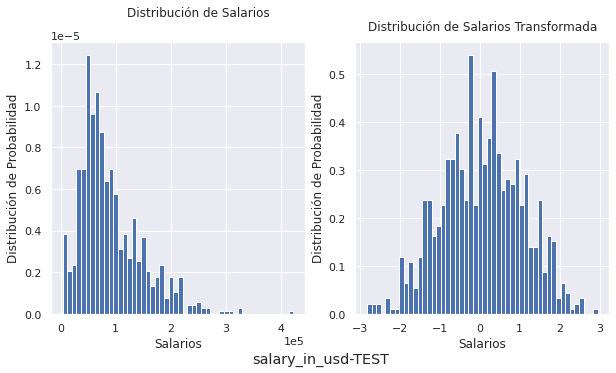

In [71]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))

ax0.hist(y, bins=50, density=True)
ax0.set_ylabel("Distribución de Probabilidad")
ax0.set_xlabel("Salarios")
ax0.text(s="Distribución de Salarios", x=1.2e5, y=14.3e-6, fontsize=12)
ax0.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
#1.2e5
ax1.hist(test["salary_in_usd"], bins=50, density=True)
ax1.set_ylabel("Distribución de Probabilidad")
ax1.set_xlabel("Salarios")
ax1.text(s="Distribución de Salarios Transformada", x=-2.8, y=0.590, fontsize=12)

f.suptitle("salary_in_usd-TEST", y=0.02)

División X Y a TEST

In [72]:
X_test = test.drop(['salary_in_usd'], axis=1) # nos quedamos con el resto
y_test = test['salary_in_usd']  # nos quedamos con la objetivo, salarios en dólares

feature_names_test = test.columns[test.columns!='salary_in_usd']

# normalización/ Escalado con los datos de Test
XtestScaled = scaler.transform(X_test) #Escalado del testing set (con el escalador calculado del training)

In [73]:
print(f'Dimensiones del Dataset de Train: {train.shape}')
print(f'Dimensiones del Dataset de Test: {test.shape}')

Dimensiones del Dataset de Train: (3213, 7)
Dimensiones del Dataset de Test: (804, 7)


### Modelos

## Decision Tree

best mean cross-validation score: 0.623
best parameters: {'max_depth': 8}


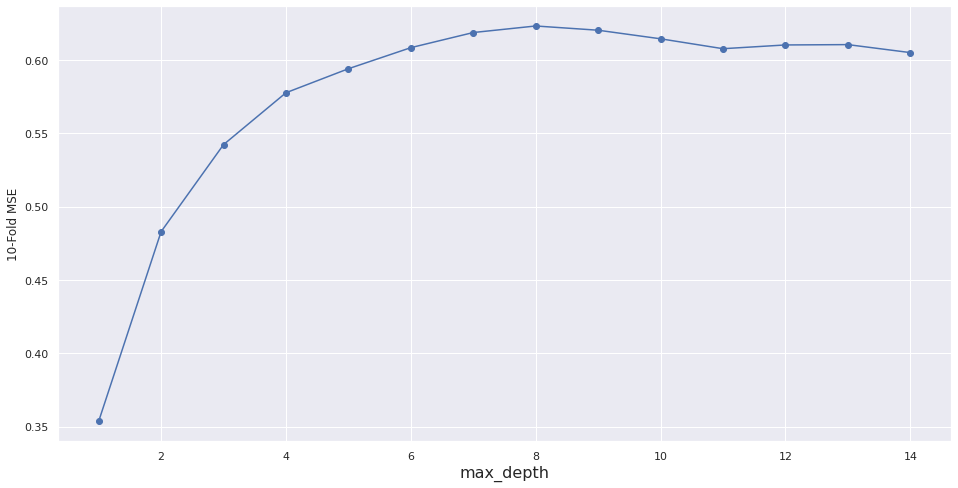

In [74]:
maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [75]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(XtrainScaled,y_train)

print("Train: ",treeModel.score(XtrainScaled,y_train))
print("Test: ",treeModel.score(XtestScaled,y_test))

Train:  0.6830914366301184
Test:  0.6078485664308629


## RandomForest

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] END ........................................max_depth=1; total time=   0.7s
[CV] END ........................................max_depth=1; total time=   0.6s
[CV] END ........................................max_depth=1; total time=   0.6s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=3; total time=   0.4s
[CV] END .......................................

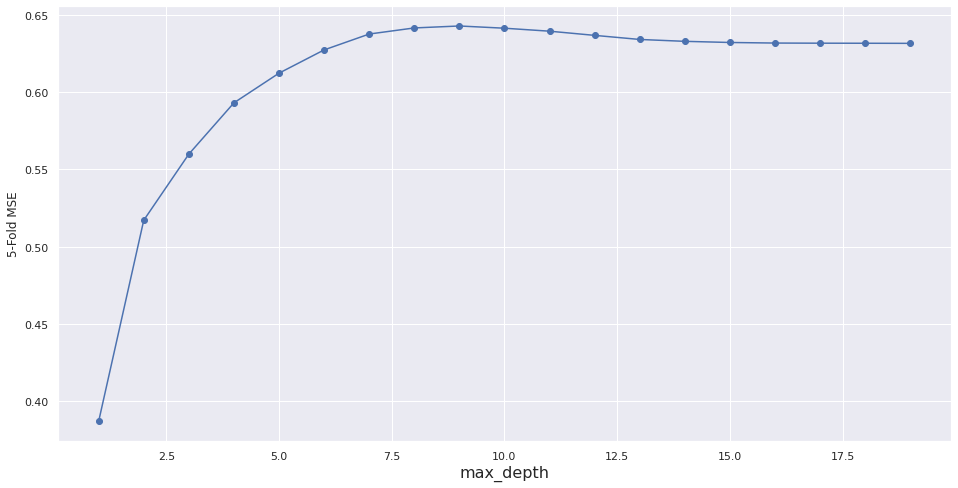

In [76]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,20)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(RandomForestRegressor(n_estimators=200, random_state=0), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('5-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [77]:
#maxDepthOptimo = grid.best_params_['max_depth']
maxDepthOptimo = 9
rf = RandomForestRegressor(max_depth=maxDepthOptimo).fit(XtrainScaled,y_train)

print("Train: ",rf.score(XtrainScaled,y_train))
print("Test: ",rf.score(XtestScaled,y_test))

Train:  0.7145007750092968
Test:  0.6377175743481406


Conocemos la importancia de las variables

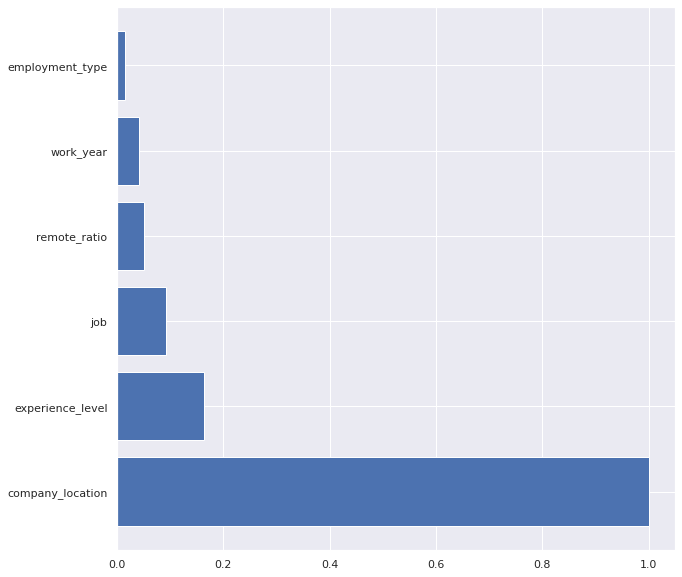

In [78]:
imp_variables = rf.feature_importances_
imp_variables = imp_variables / np.max(imp_variables)

indices = np.argsort(imp_variables)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),imp_variables[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

## GradientBoostingRegressor

In [79]:
Niterations = [50,100,150,350]
learningRate = [0.1,0.01]

# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=150; total time=   0.2s
[CV] END ................learning_rate=0.1, n_est

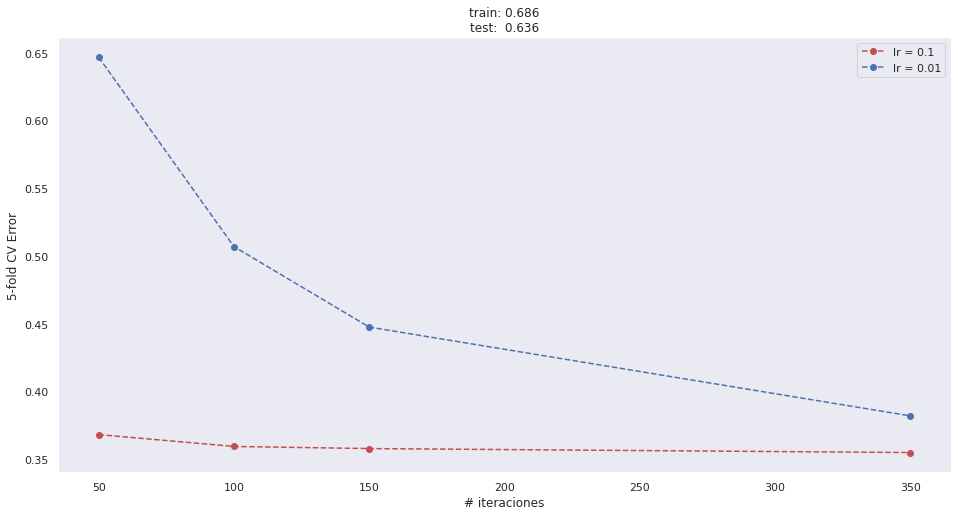

In [80]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

## **PREDICT**

Probamos el predict con el modelo que mejor resultado arrojó

In [81]:
predicciones = rf.predict(XtestScaled)
predicciones=predicciones.reshape(-1, 1)
predicciones=qt.inverse_transform(predicciones)
y_test= qt.inverse_transform(y_test.to_frame())

for y, y_pred in list(zip(y_test, predicciones)) [:5]:
    print(f"Valor Real: {y}$ Valor Estimado: {int(y_pred)}$")

Valor Real: [75525.]$ Valor Estimado: 57069$
Valor Real: [55705.]$ Valor Estimado: 60127$
Valor Real: [200000.]$ Valor Estimado: 120000$
Valor Real: [42213.]$ Valor Estimado: 52395$
Valor Real: [41296.]$ Valor Estimado: 53253$


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but QuantileTransformer was fitted with feature names



Imprimimos una predicción aleatoria

In [82]:
aux=np.random.randint(y_test.size)
print(f'Estimated Salary $ {(np.round_(predicciones[aux],2))}')

Estimated Salary $ [169974.69]
